In [7]:
import pandas as pd
from pandas import Series,DataFrame
titanicdf=pd.read_csv('train.csv')
titanicdf.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


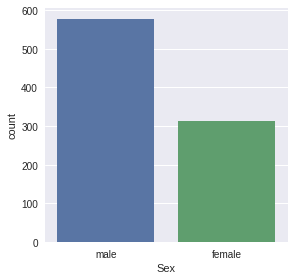

In [10]:
sns.factorplot('Sex',data=titanicdf,kind="count")

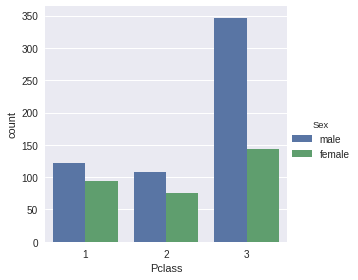

In [11]:
sns.factorplot('Pclass',data=titanicdf,hue='Sex',kind="count")

In [12]:
def male_fem_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex
titanicdf['person']=titanicdf[['Age','Sex']].apply(male_fem_child,axis=1)

In [13]:
titanicdf[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


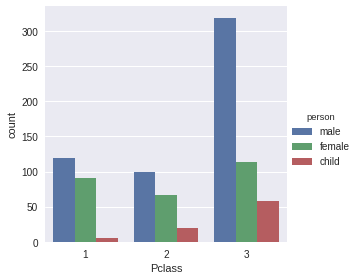

In [14]:
sns.factorplot('Pclass',data=titanicdf,hue='person',kind='count')

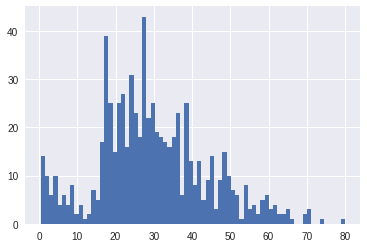

In [15]:
titanicdf['Age'].hist(bins=72)

In [16]:
titanicdf['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

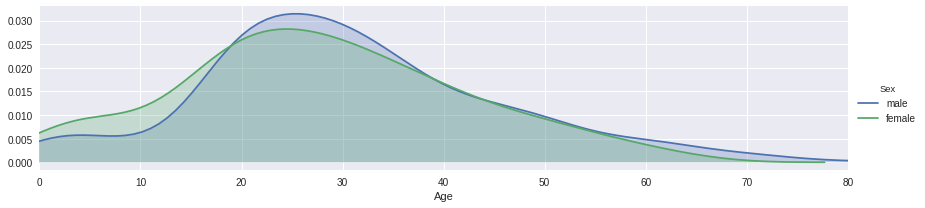

In [17]:
fig=sns.FacetGrid(titanicdf,hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanicdf['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

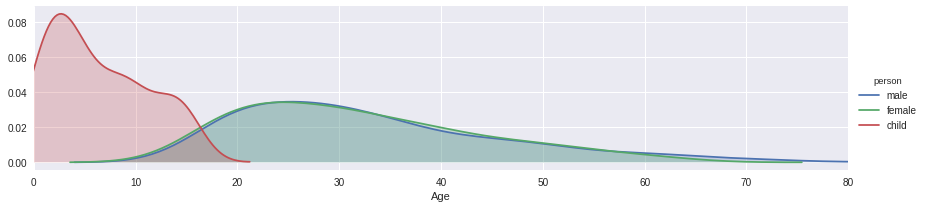

In [19]:
fig=sns.FacetGrid(titanicdf,hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanicdf['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

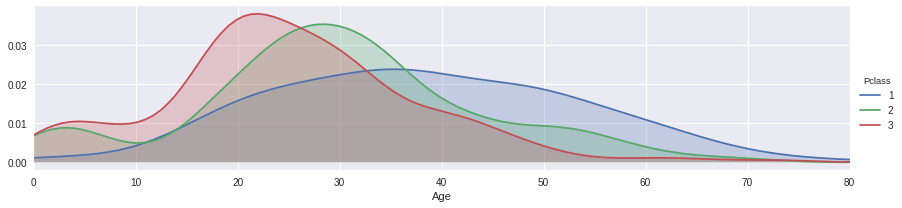

In [22]:
fig=sns.FacetGrid(titanicdf,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanicdf['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [20]:
deck=titanicdf['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

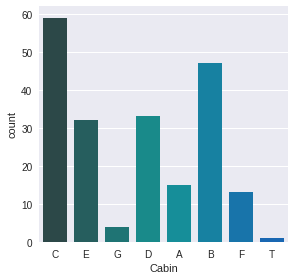

In [22]:
levels=[]
for level in deck:
    levels.append(level[0])
cabindf=DataFrame(levels)
cabindf.columns=['Cabin']
sns.factorplot('Cabin',data=cabindf,palette='winter_d',kind="count")

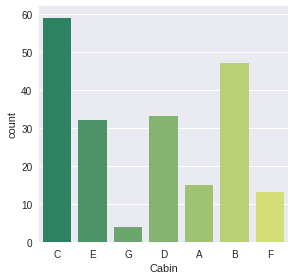

In [23]:
cabindf=cabindf[cabindf.Cabin!='T']
sns.factorplot('Cabin',data=cabindf,palette='summer',kind="count")

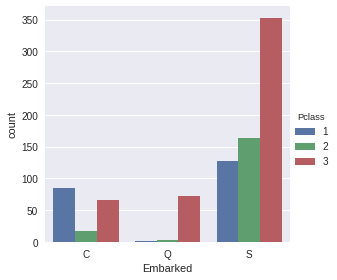

In [25]:
sns.factorplot('Embarked',data=titanicdf,hue='Pclass',order=['C','Q','S'],kind="count")


In [30]:
titanicdf['Alone']=titanicdf.Parch+titanicdf.SibSp
titanicdf['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [32]:
titanicdf['Alone'].loc[titanicdf['Alone'] >0] = 'With Family'
titanicdf['Alone'].loc[titanicdf['Alone'] == 0] = 'Alone'


/home/praneethsaiii/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


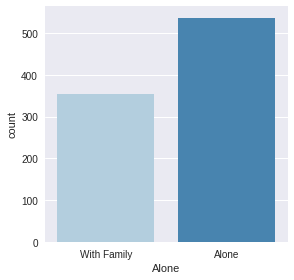

In [35]:
sns.factorplot('Alone',data=titanicdf,palette='Blues',kind="count")

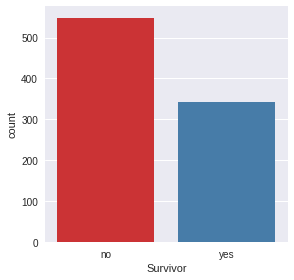

In [37]:
titanicdf["Survivor"] = titanicdf.Survived.map({0: "no", 1: "yes"})
sns.factorplot('Survivor',data=titanicdf,palette='Set1',kind="count")

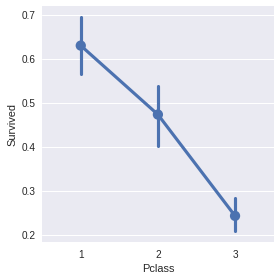

In [39]:
sns.factorplot('Pclass','Survived',data=titanicdf)

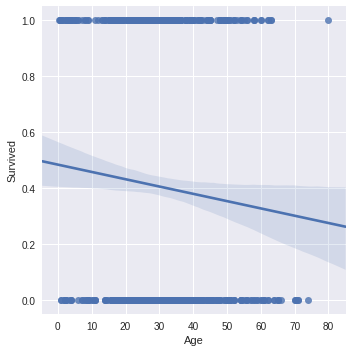

In [41]:
sns.lmplot('Age','Survived',data=titanicdf)

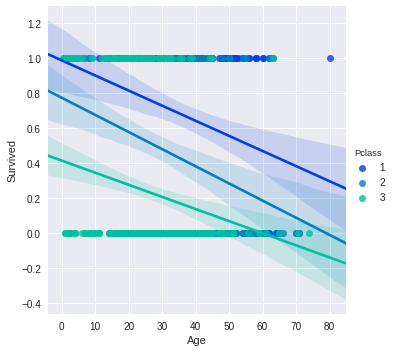

In [43]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanicdf,palette='winter')

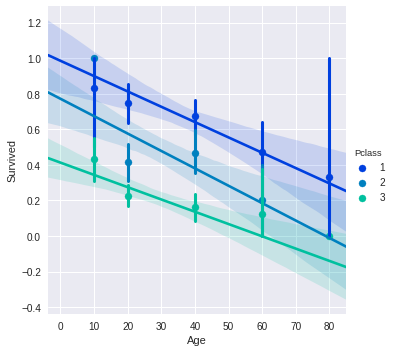

In [44]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanicdf,palette='winter',x_bins=generations)

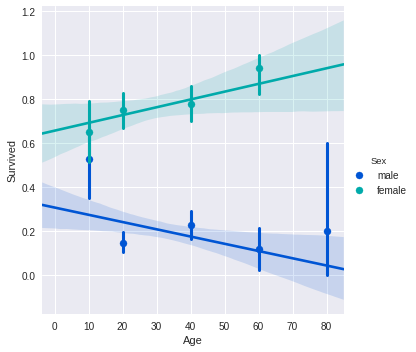

In [45]:
sns.lmplot('Age','Survived',hue='Sex',data=titanicdf,palette='winter',x_bins=generations)